# Multiple Linear Regression on Housing DataSet

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
housing = pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# looking into no of rows and columns
housing.shape

(545, 13)

In [4]:
# statistical views of data
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
# checking missing values and type
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


Two steps we need to check before building a model
    1. plotting a pairplot to check whether any variable is linearly related to target variable
    2. plotting a heatmap to check multicollinearlity

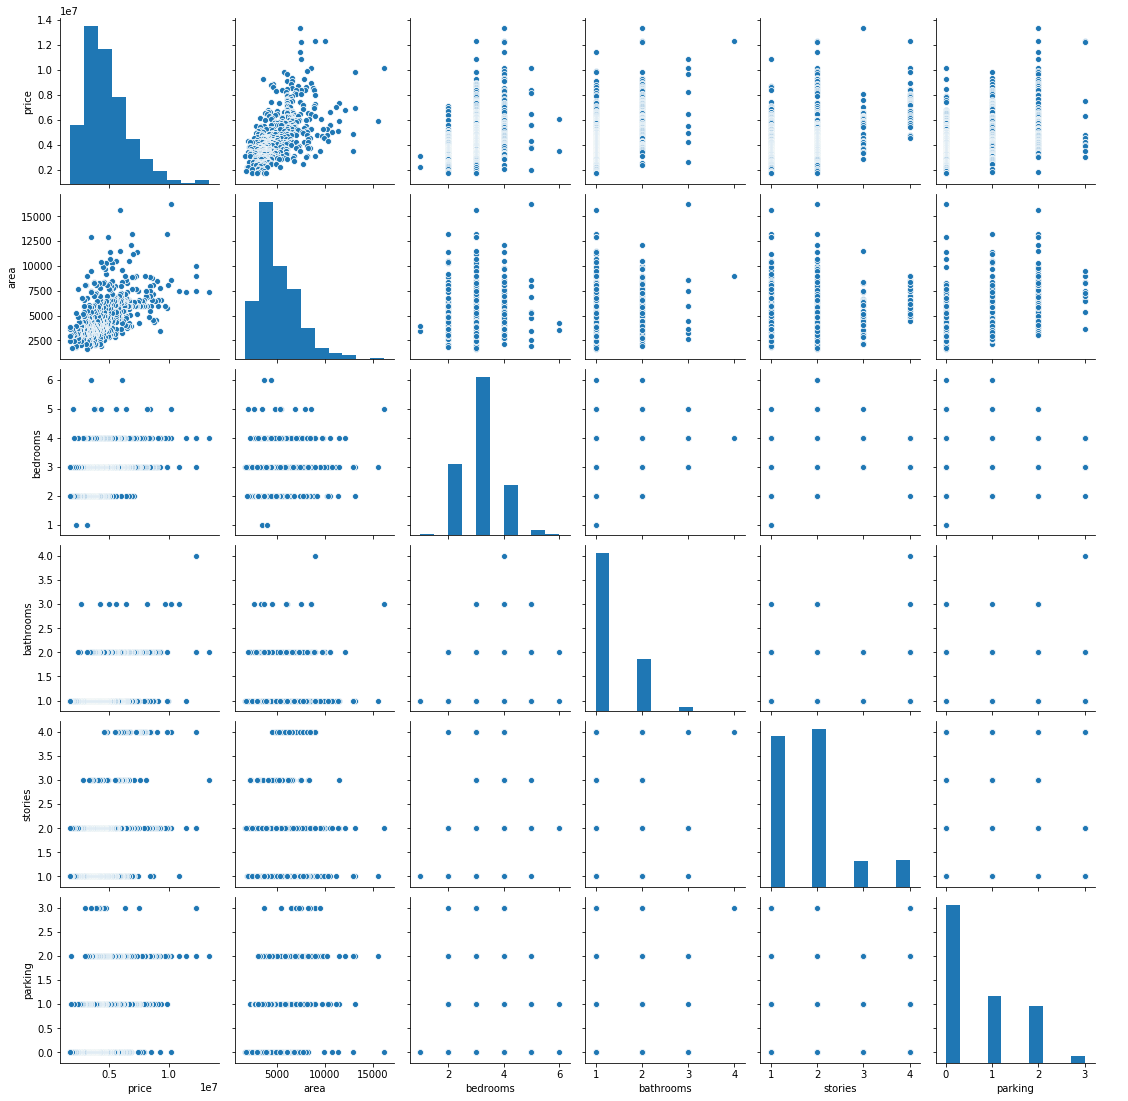

In [6]:
#pairplot
sns.pairplot(housing)
plt.show()

we can see there is positive correlation between area and price. we can consider linear regression since area is linearly related with price

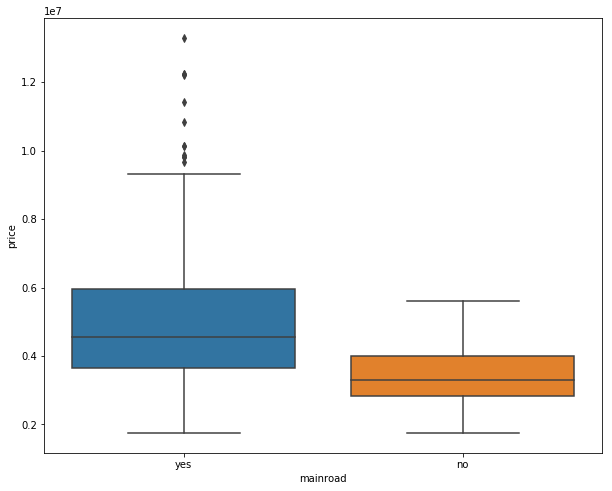

In [7]:
# visualising the categorical variable
plt.figure(figsize=(10,8))
sns.boxplot(x='mainroad',y='price',data=housing)
plt.show()

In [8]:
cat_column = [col for col in housing.columns if housing[col].dtype=='object']
cat_column

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

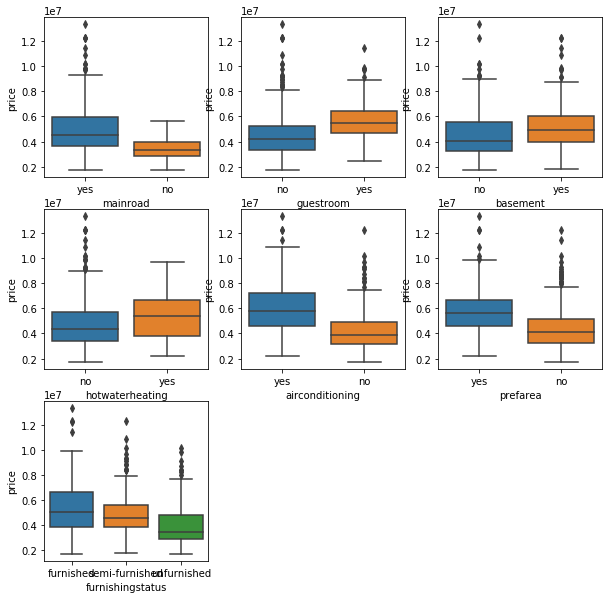

In [9]:
plt.figure(figsize=(10,10))
for index,i in enumerate(cat_column):
    plt.subplot(3,3,index+1)
    sns.boxplot(x=i,y="price",data=housing)
plt.show()

### Dummy variable creation

1. Encoding the "yes" and "no" to 0&1
2. Converting the other to dummy variables

In [10]:
# yes/no variables
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
housing[varlist] = housing[varlist].apply(lambda x:x.map({"yes":1,"no":0}))

In [11]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [12]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

# Add the results to the original housing dataframe
housing = pd.concat([housing, status], axis = 1)

# Now let's see the head of our dataframe.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [13]:
housing.drop('furnishingstatus',axis=1,inplace=True)

In [14]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### Splitting into train and test set

In [15]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(housing,train_size=0.7,random_state=100)
print(df_train.shape,df_test.shape)

(381, 14) (164, 14)


scaling of variables
    1. when we do multiple linear regression its important to scale the data since we have many variables all should be in samescale so the coefficients are comparable

Two methods for scaling
    1. MinMax scaling (normalisation between 0 and 1)
    2. Standard scaling (mean-0 and sigma-1)

Min-Max scaling
1. x normalisation : (x - xmin)/(xmax - xmin)
2. Standardisation : (x - mean(of population))/sigma
3. Min-Max scaling takes care of outliers so its the advantage over the Satndardisation since it compresses the whole data between 0 and 1

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate an object
scaler = MinMaxScaler()

# Fit on the data(only numerical variables)
num_col = ['price', 'area', 'bedrooms', 'bathrooms', 'stories','parking']
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_train.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


1. fit() : learns xmin and xmax 
2. transform() : computation x-xmin/xmax-xmin
3. fit_transform() : computes both fit and transform
when to use all this

# Training the model

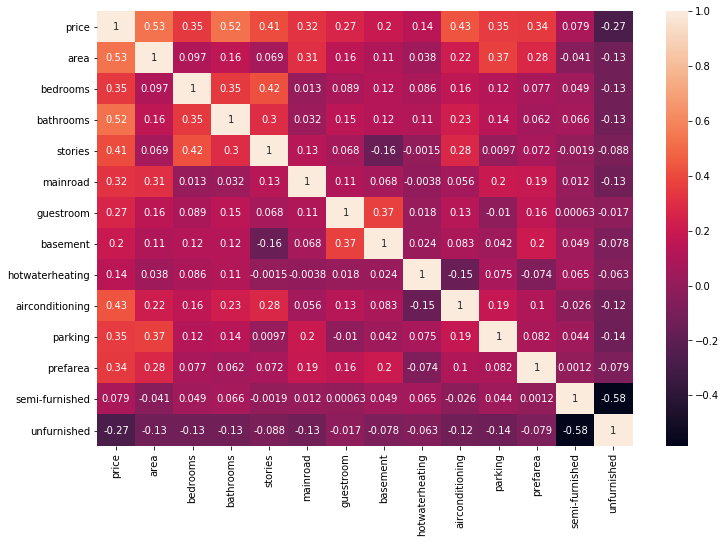

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

checking the correaltion coefficients before building the model.

## RFE